In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [413]:
df_train= pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Events Data.xlsx")
df_teams = pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Game Metadata.xlsx", sheet_name=0)
df_managers=  pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Game Metadata.xlsx", sheet_name=1)
df_managerhistory=  pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Game Metadata.xlsx", sheet_name=2)
df_referees= pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Game Metadata.xlsx", sheet_name=3)
df_test= pd.read_excel(r"E:\Competitions\EXL Acumen\Data & Submission Template\Test Data.xlsx")

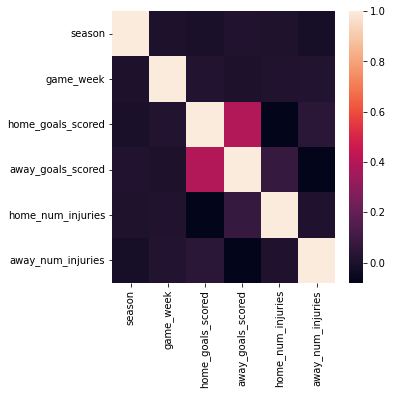

In [414]:
dataplot=sns.heatmap(df_train.corr())
plt.show()


Data Cleaning and Transformation

Checking for null values

In [415]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
season,0,0.0
game_week,0,0.0
game_id,0,0.0
game_date,0,0.0
home_team_id,0,0.0
away_team_id,0,0.0
home_goals_scored,0,0.0
away_goals_scored,0,0.0
home_formation,0,0.0
away_formation,0,0.0


In [416]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
season,0.0,0.0
game_week,0.0,0.0
game_id,0.0,0.0
game_date,0.0,0.0
home_team_id,0.0,0.0
away_team_id,0.0,0.0
home_formation,0.0,0.0
away_formation,0.0,0.0
home_num_injuries,0.0,0.0
away_num_injuries,0.0,0.0


EDA

In [417]:
df_train['home_team_name'] = df_train.apply(lambda x : df_teams[df_teams['team_id']==x['home_team_id']]['team_name'].iloc[0], axis=1)
df_train['away_team_name'] = df_train.apply(lambda x : df_teams[df_teams['team_id']==x['away_team_id']]['team_name'].iloc[0], axis=1)
df_train['refree_name'] = df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_name'].iloc[0], axis=1)
df_train['referee_country']= df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_country'].iloc[0], axis=1)
df_train['home_team_country'] = df_train.apply(lambda x : df_teams[df_teams['team_id']==x['home_team_id']]['team_country'].iloc[0], axis=1)
df_train['away_team_country'] = df_train.apply(lambda x : df_teams[df_teams['team_id']==x['away_team_id']]['team_country'].iloc[0], axis=1)

In [418]:
df_test['home_team_name'] = df_test.apply(lambda x : df_teams[df_teams['team_id']==x['home_team_id']]['team_name'].iloc[0], axis=1)
df_test['away_team_name'] = df_test.apply(lambda x : df_teams[df_teams['team_id']==x['away_team_id']]['team_name'].iloc[0], axis=1)
df_test['refree_name'] = df_test.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_name'].iloc[0], axis=1)
df_test['referee_country']= df_test.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_country'].iloc[0], axis=1)
df_test['home_team_country'] = df_test.apply(lambda x : df_teams[df_teams['team_id']==x['home_team_id']]['team_country'].iloc[0], axis=1)
df_test['away_team_country'] = df_test.apply(lambda x : df_teams[df_teams['team_id']==x['away_team_id']]['team_country'].iloc[0], axis=1)

In [419]:
home_goals = df_train.groupby(['home_team_name'])['home_goals_scored'].sum().reset_index()
away_goals = df_train.groupby(['away_team_name'])['away_goals_scored'].sum().reset_index()
home_goals.columns = ['index','home_goals_scored']
away_goals.columns = ['index','away_goals_scored']
total_goals_scored = pd.merge(home_goals, away_goals ,how ='right',on ='index')
total_goals_scored.sort_values(by=['home_goals_scored','away_goals_scored'], ascending = False).head()



,index,home_goals_scored,away_goals_scored
0,Byzantinobul,790,645
2,Chamartin,748,696
12,Old Firm,739,662
4,Hammarby,725,621
7,Manzanares,718,654


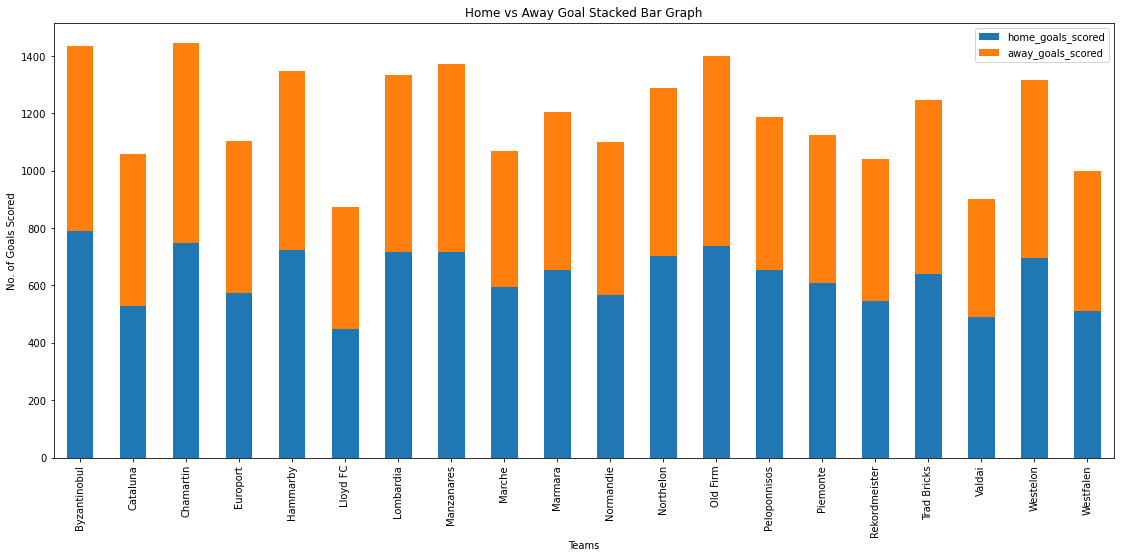

In [420]:
plt.rcParams['figure.figsize'] = [19, 8]
total_goals_scored.plot(x='index', kind='bar', stacked=True, title='Home vs Away Goal Stacked Bar Graph')
plt.xlabel('Teams')
plt.ylabel('No. of Goals Scored')
plt.show()

In [421]:
df_train['Result'] = np.where(df_train['home_goals_scored']> df_train['away_goals_scored'],'HomeTeamWin', np.where(df_train['home_goals_scored']< df_train['away_goals_scored'], 'AwayTeamWin', "Draw"))
df_train['Winner']= np.where(df_train['home_goals_scored']> df_train['away_goals_scored'],df_train['home_team_name'],df_train['away_team_name'])
df_train['Winner_id']= np.where(df_train['home_goals_scored']> df_train['away_goals_scored'],df_train['home_team_id'],df_train['away_team_id'])
df_train['Loser_id']=np.where(df_train['home_goals_scored']> df_train['away_goals_scored'],df_train['away_team_id'],df_train['home_team_id'])
df_train['winner_country']= df_train.apply(lambda x : df_teams[df_teams['team_id']==x['Winner_id']]['team_country'].iloc[0], axis=1)
df_train['WinnerGoals'] = np.where(df_train['Result'] == 'HomeTeamWin',df_train['home_goals_scored'], np.where(df_train['Result'] == 'AwayTeamWin', df_train['away_goals_scored'], df_train['home_goals_scored']))
df_train['TotalGoal'] = df_train['home_goals_scored'] + df_train['away_goals_scored']
df_train['GoalDif']= df_train['home_goals_scored']- df_train['away_goals_scored']

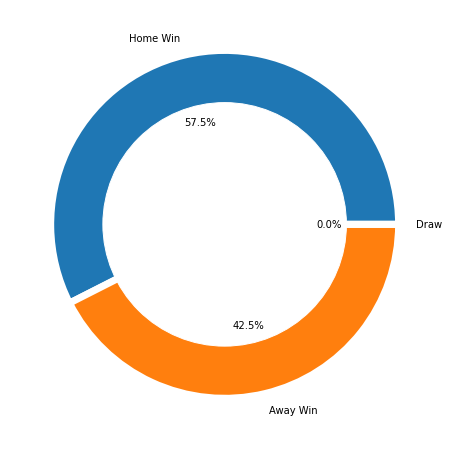

In [422]:
total_matches = len(df_train['Result'])
home_win_per = round((df_train[df_train.Result =='HomeTeamWin'].count()[0]/total_matches)*100,3)
away_win_per = round((df_train[df_train.Result =='AwayTeamWin'].count()[0]/total_matches)*100,3)
draw_matches = round((df_train[df_train.Result =='Draw'].count()[0]/total_matches)*100,3)

# Create a pie plot for better Visualization
plt.rcParams['figure.figsize'] = [19, 8]
names = ['Home Win', 'Away Win', 'Draw']
complied_data = home_win_per, away_win_per, draw_matches

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(complied_data, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, autopct="%.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

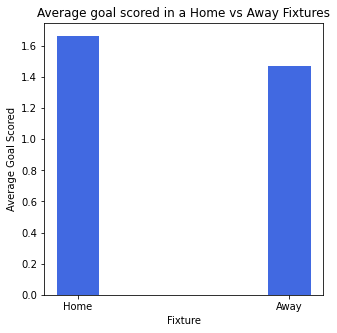

In [423]:
plt.rcParams['figure.figsize'] = [5, 5]
fixtures = 'Home','Away'
avg_goals = df_train['home_goals_scored'].mean(), df_train['away_goals_scored'].mean()

plt.bar(fixtures, avg_goals, color ='royalblue', width = 0.2)
plt.xlabel("Fixture")
plt.ylabel("Average Goal Scored")
plt.title("Average goal scored in a Home vs Away Fixtures")
plt.show()

In [424]:
import datetime
df_train['Date'] = pd.to_datetime(df_train["game_date"])


df_train['Week'] = df_train['Date'].dt.isocalendar().week
df_train['Week']=df_train['Week'].astype("int64")

df_train['Day'] = df_train['Date'].dt.isocalendar().day
df_train['Day']=df_train['Day'].astype("int64")

df_train['Season']= np.where(df_train['season']==2012,"1", np.where(df_train['season']==2013,"2", np.where(df_train['season']==2014, "3",np.where(df_train['season']==2015, "4",np.where(df_train['season']==2016, "5", np.where(df_train['season']==2017, "6", np.where(df_train['season']==2018, "7", np.where(df_train['season']==2019, "8", np.where(df_train['season']==2020, "9", np.where(df_train['season']==2021, "10", 0))))))))))
df_train['Season']=pd.to_numeric(df_train['Season'])
df_train['Date']=pd.to_numeric(df_train['Date'])

In [425]:
import datetime
df_test['Date'] = pd.to_datetime(df_test["game_date"])


df_test['Week'] = df_test['Date'].dt.isocalendar().week
df_test['Week']=df_test['Week'].astype("int64")

df_test['Day'] = df_test['Date'].dt.isocalendar().day
df_test['Day']=df_test['Day'].astype("int64")

df_test['Season']= np.where(df_test['season']==2012,"1", np.where(df_test['season']==2013,"2", np.where(df_test['season']==2014, "3",np.where(df_test['season']==2015, "4",np.where(df_test['season']==2016, "5", np.where(df_test['season']==2017, "6", np.where(df_test['season']==2018, "7", np.where(df_test['season']==2019, "8", np.where(df_test['season']==2020, "9", np.where(df_test['season']==2021, "10", 0))))))))))
df_test['Season']=pd.to_numeric(df_test['Season'])
df_test['Date']=pd.to_numeric(df_test['Date'])

FEATURE EXTRACTION

In [426]:
home_form= df_train["home_formation"].str.split(" ", expand = True)
df_train["home_defense"]= home_form[0]
df_train["home_midfield"]= home_form[1]
df_train["home_attack"]= home_form[2]
away_form= df_train["away_formation"].str.split(" ", expand = True)
df_train["away_defense"]= away_form[0]
df_train["away_midfield"]= away_form[1]
df_train["away_attack"]= away_form[2]




In [427]:
home_form= df_test["home_formation"].str.split(" ", n = 2, expand = True)
df_test["home_defense"]= home_form[0]
df_test["home_midfield"]= home_form[1]
df_test["home_attack"]= home_form[2]
away_form= df_train["away_formation"].str.split(" ",n = 2,  expand = True)
df_test["away_defense"]= away_form[0]
df_test["away_midfield"]= away_form[1]
df_test["away_attack"]= away_form[2]




In [428]:
df_train['Home_Defense']= np.where(df_train['home_defense']=="one", 1, np.where(df_train['home_defense']=="two", 2, np.where(df_train['home_defense']=="three", 3, np.where(df_train['home_defense']=="four", 4, np.where(df_train['home_defense']=="five", 5, 0)))))
df_train['Home_Attack']= np.where(df_train['home_attack']=="one", 1, np.where(df_train['home_attack']=="two", 2, np.where(df_train['home_attack']=="three", 3, np.where(df_train['home_attack']=="four", 4, np.where(df_train['home_attack']=="five", 5, 0)))))
df_train['Home_Midfield']= np.where(df_train['home_midfield']=="one", 1, np.where(df_train['home_midfield']=="two", 2, np.where(df_train['home_midfield']=="three", 3, np.where(df_train['home_midfield']=="four", 4, np.where(df_train['home_midfield']=="five", 5, 0)))))
df_train['Away_Defense']= np.where(df_train['away_defense']=="one", 1, np.where(df_train['away_defense']=="two", 2, np.where(df_train['away_defense']=="three", 3, np.where(df_train['away_defense']=="four", 4, np.where(df_train['away_defense']=="five", 5, 0)))))
df_train['Away_Attack']= np.where(df_train['away_attack']=="one", 1, np.where(df_train['away_attack']=="two", 2, np.where(df_train['away_attack']=="three", 3, np.where(df_train['away_attack']=="four", 4, np.where(df_train['away_attack']=="five", 5, 0)))))
df_train['Away_Midfield']= np.where(df_train['away_midfield']=="one", 1, np.where(df_train['away_midfield']=="two", 2, np.where(df_train['away_midfield']=="three", 3, np.where(df_train['away_midfield']=="four", 4, np.where(df_train['away_midfield']=="five", 5, 0)))))

In [429]:
df_test['Home_Defense']= np.where(df_test['home_defense']=="one", 1, np.where(df_test['home_defense']=="two", 2, np.where(df_test['home_defense']=="three", 3, np.where(df_test['home_defense']=="four", 4, np.where(df_test['home_defense']=="five", 5, 0)))))
df_test['Home_Attack']= np.where(df_test['home_attack']=="one", 1, np.where(df_test['home_attack']=="two", 2, np.where(df_test['home_attack']=="three", 3, np.where(df_test['home_attack']=="four", 4, np.where(df_test['home_attack']=="five", 5, 0)))))
df_test['Home_Midfield']= np.where(df_test['home_midfield']=="one", 1, np.where(df_test['home_midfield']=="two", 2, np.where(df_test['home_midfield']=="three", 3, np.where(df_test['home_midfield']=="four", 4, np.where(df_test['home_midfield']=="five", 5, 0)))))
df_test['Away_Defense']= np.where(df_test['away_defense']=="one", 1, np.where(df_test['away_defense']=="two", 2, np.where(df_test['away_defense']=="three", 3, np.where(df_test['away_defense']=="four", 4, np.where(df_test['away_defense']=="five", 5, 0)))))
df_test['Away_Attack']= np.where(df_test['away_attack']=="one", 1, np.where(df_test['away_attack']=="two", 2, np.where(df_test['away_attack']=="three", 3, np.where(df_test['away_attack']=="four", 4, np.where(df_test['away_attack']=="five", 5, 0)))))
df_test['Away_Midfield']= np.where(df_test['away_midfield']=="one", 1, np.where(df_test['away_midfield']=="two", 2, np.where(df_test['away_midfield']=="three", 3, np.where(df_test['away_midfield']=="four", 4, np.where(df_test['away_midfield']=="five", 5, 0)))))

In [430]:
df_train['Home Strength']=np.where(df_train["home_num_injuries"]>0, 1/df_train["home_num_injuries"], 1)
df_train['Away Strength']=np.where(df_train["away_num_injuries"]>0, 1/df_train["away_num_injuries"], 1)


In [431]:
df_test['Home Strength']=np.where(df_test["home_num_injuries"]>0, 1/df_test["home_num_injuries"], 1)
df_test['Away Strength']=np.where(df_test["away_num_injuries"]>0, 1/df_test["away_num_injuries"], 1)


TEAM-PERFORMANCE- ON HOME GROUND AND AWAY GROUND

In [432]:
goals_s1= df_train.groupby(['home_team_name', 'Season'])['home_goals_scored'].sum().to_frame().reset_index()
goals_s2=df_train.groupby(['away_team_name', 'Season'])['away_goals_scored'].sum().to_frame().reset_index()
goals_s3= df_train.groupby(['home_team_name', 'Season'])['home_num_injuries'].sum().to_frame().reset_index()
goals_s4= df_train.groupby(['away_team_name', 'Season'])['away_num_injuries'].sum().to_frame().reset_index()
goals_s1.rename(columns = {'home_team_name':'team_name'}, inplace = True)
goals_s2.rename(columns = {'away_team_name':'team_name'}, inplace = True)
goals_s3.rename(columns = {'home_team_name':'team_name'}, inplace = True)
goals_s4.rename(columns = {'away_team_name':'team_name'}, inplace = True)
goals_s5= pd.merge(goals_s1, goals_s2)
goals_s6=pd.merge(goals_s3, goals_s4)
goals_s7=pd.merge(goals_s5, goals_s6)
goals_s7["Goals_scored"]= goals_s7["home_goals_scored"]+goals_s7["away_goals_scored"]
goals_s7["Injuries"]=goals_s7["home_num_injuries"]+ goals_s7["away_num_injuries"]
goals_s7.head()



,team_name,Season,home_goals_scored,away_goals_scored,home_num_injuries,away_num_injuries,Goals_scored,Injuries
0,Byzantinobul,1,76,58,35,38,134,73
1,Byzantinobul,2,78,66,32,36,144,68
2,Byzantinobul,3,78,72,40,44,150,84
3,Byzantinobul,4,80,49,42,40,129,82
4,Byzantinobul,5,76,72,37,26,148,63


In [433]:
goals_s8= df_train.groupby(['home_team_name', 'Season'])['away_goals_scored'].sum().to_frame().reset_index()
goals_s9=df_train.groupby(['away_team_name', 'Season'])['home_goals_scored'].sum().to_frame().reset_index()
goals_s8.rename(columns = {'home_team_name':'team_name'}, inplace = True)
goals_s8.rename(columns = {'away_goals_scored':'home_goals_conceded'}, inplace = True)
goals_s9.rename(columns = {'away_team_name':'team_name'}, inplace = True)
goals_s9.rename(columns = {'home_goals_scored':'away_goals_conceded'}, inplace = True)
goals_s10= pd.merge(goals_s8, goals_s9)
goals_s10["Goals_conceded"]= goals_s10["home_goals_conceded"]+goals_s10["away_goals_conceded"]
goals_s11=pd.merge(goals_s7, goals_s10)


In [434]:
goals_s11.drop(['home_num_injuries', 'away_num_injuries'], axis=1, inplace=True)

In [435]:
goals_s11.head()

,team_name,Season,home_goals_scored,away_goals_scored,Goals_scored,Injuries,home_goals_conceded,away_goals_conceded,Goals_conceded
0,Byzantinobul,1,76,58,134,73,28,62,90
1,Byzantinobul,2,78,66,144,68,44,47,91
2,Byzantinobul,3,78,72,150,84,35,57,92
3,Byzantinobul,4,80,49,129,82,43,57,100
4,Byzantinobul,5,76,72,148,63,53,56,109


In [436]:
goals_s11['home_ground_performance'] = 0
goals_s11['away_ground_performance'] = 0
for i in range(len(goals_s11)):
    if(goals_s11['Season'][i]==1):
        goals_s11.loc[i,'home_ground_performance']= (1/goals_s11.loc[i,'Injuries'])
        goals_s11.loc[i,'away_ground_performance']= (1/goals_s11.loc[i,'Injuries'])
    else:
        goals_s11.loc[i,'home_ground_performance']= (1/goals_s11.loc[i,'Injuries'])*(goals_s11.loc[i-1,'home_goals_scored']/goals_s11.loc[i-1,'home_goals_conceded'])
        goals_s11.loc[i,'away_ground_performance']= (1/goals_s11.loc[i,'Injuries'])*(goals_s11.loc[i-1,'away_goals_scored']/goals_s11.loc[i-1,'away_goals_conceded']) 

goals_s11['home_ground_performance']=goals_s11['home_ground_performance']*100
goals_s11['away_ground_performance']=goals_s11['away_ground_performance']*100
goals_s11.head()

,team_name,Season,home_goals_scored,away_goals_scored,Goals_scored,Injuries,home_goals_conceded,away_goals_conceded,Goals_conceded,home_ground_performance,away_ground_performance
0,Byzantinobul,1,76,58,134,73,28,62,90,1.369863,1.369863
1,Byzantinobul,2,78,66,144,68,44,47,91,3.991597,1.375712
2,Byzantinobul,3,78,72,150,84,35,57,92,2.110390,1.671733
3,Byzantinobul,4,80,49,129,82,43,57,100,2.717770,1.540436
4,Byzantinobul,5,76,72,148,63,53,56,109,2.953119,1.364522


In [437]:
df_train['HT_team_performance']=df_train.apply(lambda x : goals_s11[(goals_s11['team_name']==x['home_team_name']) & (goals_s11['Season']==x['Season'])]['home_ground_performance'].iloc[0], axis=1)


In [438]:
df_train['AT_team_performance']=df_train.apply(lambda x : goals_s11[(goals_s11['team_name']==x['away_team_name']) & (goals_s11['Season']==x['Season'])]['away_ground_performance'].iloc[0], axis=1)

In [439]:
df_train.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_goals_scored,away_goals_scored,home_formation,away_formation,...,Home_Defense,Home_Attack,Home_Midfield,Away_Defense,Away_Attack,Away_Midfield,Home Strength,Away Strength,HT_team_performance,AT_team_performance
0,2012,1,efl_00001,2012/02/08,xmq321,1xyza3,1,0,four three three,four two four,...,4,3,3,4,4,2,1.0,0.500000,1.333333,1.333333
1,2012,1,efl_00002,2012/02/08,ytug99,jzxz42,2,3,four five one,four three three,...,4,1,5,4,3,3,1.0,1.000000,1.298701,1.250000
2,2012,1,efl_00003,2012/02/08,9hgy&,uythe,2,3,four five one,four five one,...,4,1,5,4,1,5,1.0,0.250000,1.408451,1.075269
3,2012,1,efl_00004,2012/02/08,6re#$3,bl4a#,2,0,four five one,three four three,...,4,1,5,3,3,4,1.0,0.333333,1.724138,1.369863
4,2012,1,efl_00005,2012/02/08,gyu43a,krkbr33,2,3,four four two,four five one,...,4,2,4,4,1,5,1.0,1.000000,1.612903,1.351351


In [440]:
df_test['HT_team_performance']=df_test.apply(lambda x : goals_s11[(goals_s11['team_name']==x['home_team_name']) & (goals_s11['Season']==10)]['home_ground_performance'].iloc[0], axis=1)

In [441]:
df_test['AT_team_performance']=df_test.apply(lambda x : goals_s11[(goals_s11['team_name']==x['away_team_name']) & (goals_s11['Season']==10)]['away_ground_performance'].iloc[0], axis=1)

In [442]:
df_test.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_formation,away_formation,home_num_injuries,away_num_injuries,...,Home_Defense,Home_Attack,Home_Midfield,Away_Defense,Away_Attack,Away_Midfield,Home Strength,Away Strength,HT_team_performance,AT_team_performance
0,2022,1,efl_07601,2022/02/09,ju$xzs,1xyza3,five three two,five three two,1,0,...,5,2,3,4,4,2,1.000000,1.000000,0.788955,1.670507
1,2022,1,efl_07602,2022/02/09,zd78$,xmq321,five four one,four two four,1,1,...,5,1,4,4,3,3,1.000000,1.000000,1.092896,1.077586
2,2022,1,efl_07603,2022/02/09,rew#ff,xuxa#,four four two,four four two,1,0,...,4,2,4,4,1,5,1.000000,1.000000,1.135006,1.882353
3,2022,1,efl_07604,2022/02/09,9hgy&,ytug99,three four three,four three three,3,0,...,3,3,4,3,3,4,0.333333,1.000000,1.938657,1.044806
4,2022,1,efl_07605,2022/02/09,gyu43a,p235rr,four three three,three four three,0,3,...,4,3,3,4,1,5,1.000000,0.333333,1.536885,0.889047


REFREE METRICS

In [443]:
df_teams.head()

,team_id,team_name,team_city,team_location,team_country,team_stadium,stadium_capacity
0,xyx311,Lloyd FC,Wakefield,"53.6833 N, 1.5059 W",England,Marvel Ground,38439
1,p235rr,Rekordmeister,Berlin,"52.5200 N, 13.4050 E",Germany,Hoofdstad Stadion,63753
2,gyt676,Lombardia,Verona,"45.4384 N, 10.9916 E",Italy,Stadio Nazionale,51268
3,krkbr33,Manzanares,Malaga,"36.7213 N, 4.4213 W",Spain,Cornella,32037
4,bl4a#,Byzantinobul,Istanbul,"41.0082 N, 28.9784 E",Turkey,Ataturk Olympic,35008


In [444]:
df_train['referee_name']= df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_name'].iloc[0], axis=1)
df_train['referee_country']= df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_country'].iloc[0], axis=1)
df_train['referee_experience']= df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_experience'].iloc[0], axis=1)
df_train['Winning_team_country']= df_train.apply(lambda x : df_teams[df_teams['team_name']==x['Winner']]['team_country'].iloc[0], axis=1)
df_train['referee_height']=df_train.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_height'].iloc[0], axis=1)



In [445]:
r1=df_train.groupby('referee_name')['game_id'].count().to_frame().reset_index()
r2=df_train.assign(result1 = np.where(df_train['Winning_team_country']==df_train['referee_country'],1,0)).groupby('referee_name').agg({'result1':sum}).reset_index()
r3=df_train.assign(result2= np.where(df_train['home_team_country']==df_train['referee_country'],1, np.where(df_train['away_team_country']==df_train['referee_country'],1,0))).groupby('referee_name').agg({'result2':sum}).reset_index()
r4= pd.merge(r2, r3, on='referee_name')

In [446]:
r4["referee bias"]=r4["result1"]/ r4["result2"]
r4['referee_height']= r4.apply(lambda x : df_referees[df_referees['referee_name']==x['referee_name']]['referee_height'].iloc[0], axis=1)
r4['referee_experience']= r4.apply(lambda x : df_referees[df_referees['referee_name']==x['referee_name']]['referee_experience'].iloc[0], axis=1)
r4['referee_performance']=r4['referee_experience']*(r4['referee_height']/r4['referee bias'])*pow(10,-3)

In [447]:
df_train['referee performance']=df_train.apply(lambda x : r4[r4['referee_name']==x['referee_name']]['referee_performance'].iloc[0], axis=1)
df_train['referee bias']=df_train.apply(lambda x : r4[r4['referee_name']==x['referee_name']]['referee bias'].iloc[0], axis=1)

In [448]:
df_test['referee_name']= df_test.apply(lambda x : df_referees[df_referees['referee_id']==x['referee_id']]['referee_name'].iloc[0], axis=1)
df_test['referee performance']=df_test.apply(lambda x : r4[r4['referee_name']==x['referee_name']]['referee_performance'].iloc[0], axis=1)
df_test['referee bias']=df_test.apply(lambda x : r4[r4['referee_name']==x['referee_name']]['referee bias'].iloc[0], axis=1)

In [449]:
df_managerhistory['Manager_name']= df_managerhistory.apply(lambda x : df_managers[df_managers['manager_id']==x['manager_id']]['manager_name'].iloc[0], axis=1)

In [450]:
df_train['HT_manager_name']=df_train.apply(lambda x : df_managerhistory[(df_managerhistory['team_id']==x['home_team_id']) & (df_managerhistory['season']==x['season'])]['Manager_name'].iloc[0], axis=1)
df_train['AT_manager_name']=df_train.apply(lambda x : df_managerhistory[(df_managerhistory['team_id']==x['away_team_id']) & (df_managerhistory['season']==x['season'])]['Manager_name'].iloc[0], axis=1)


In [451]:
df_test['HT_manager_name']=df_test.apply(lambda x : df_managerhistory[(df_managerhistory['team_id']==x['home_team_id']) & (df_managerhistory['season']==x['season'])]['Manager_name'].iloc[0], axis=1)
df_test['AT_manager_name']=df_test.apply(lambda x : df_managerhistory[(df_managerhistory['team_id']==x['away_team_id']) & (df_managerhistory['season']==x['season'])]['Manager_name'].iloc[0], axis=1)


MANAGERS-PERFORMANCE

In [452]:
m1=df_train.assign(win1= np.where(df_train['Result']=='HomeTeamWin',1, 0)).groupby(['HT_manager_name', 'season']).agg({'win1':sum}).reset_index()
m1.rename(columns = {'HT_manager_name':'Manager_name'}, inplace = True)
m2=df_train.assign(win2= np.where(df_train['Result']=='AwayTeamWin',1, 0)).groupby(['AT_manager_name', 'season']).agg({'win2':sum}).reset_index()
m2.rename(columns = {'AT_manager_name':'Manager_name'}, inplace = True)
m3= df_train.assign(loss1= np.where(df_train['Result']=='AwayTeamWin',1, 0)).groupby(['HT_manager_name', 'season']).agg({'loss1':sum}).reset_index()
m3.rename(columns = {'HT_manager_name':'Manager_name'}, inplace = True)
m4= df_train.assign(loss2= np.where(df_train['Result']=='HomeTeamWin',1, 0)).groupby(['AT_manager_name', 'season']).agg({'loss2':sum}).reset_index()
m4.rename(columns = {'AT_manager_name':'Manager_name'}, inplace = True)
m5=pd.merge(m1,m2, on=['Manager_name', 'season'])
m6=pd.merge(m3,m4, on= ['Manager_name', 'season'])
m7=pd.merge(m5,m6, on=['Manager_name', 'season'])
m7["Total Win"]= m7['win1']+m7['win2']
m7["Total Loss"]= m7['loss1']+m7['loss2']


In [453]:
m7['MA']=m7.apply(lambda x : df_managers[df_managers['manager_name']==x['Manager_name']]['manager_age'].iloc[0], axis=1)
m7['Manager_Age']= np.where(m7['season']==2021, m7['MA'], np.where(m7['season']==2020, m7['MA']-1, np.where(m7['season']==2019, m7['MA']-2, np.where(m7['season']==2018, m7['MA']-3, np.where(m7['season']==2017, m7['MA']-4, np.where(m7['season']==2016, m7['MA']-5, np.where(m7['season']==2015, m7['MA']-6, np.where(m7['season']==2014, m7['MA']-7, np.where(m7['season']==2013, m7['MA']-8, np.where(m7['season']==2012, m7['MA']-9, 0))))))))))

In [454]:
m7['Manager_performance']= (m7['Total Win']/ m7['Total Loss'])*m7['Manager_Age']*pow(10,-2)
m7

,Manager_name,season,win1,win2,loss1,loss2,Total Win,Total Loss,MA,Manager_Age,Manager_performance
0,Alexander Lindelof,2012,29,23,9,15,52,24,64,55,1.191667
1,Alexander Lindelof,2013,29,19,9,19,48,28,64,56,0.960000
2,Alexander Lindelof,2014,32,25,6,13,57,19,64,57,1.710000
3,Alexander Lindelof,2015,28,23,10,15,51,25,64,58,1.183200
4,Alexander Lindelof,2016,29,26,9,12,55,21,64,59,1.545238
...,...,...,...,...,...,...,...,...,...,...,...
195,Zlatan Andersson,2017,30,19,8,19,49,27,60,56,1.016296
196,Zlatan Andersson,2018,31,31,7,7,62,14,60,57,2.524286
197,Zlatan Andersson,2019,33,29,5,9,62,14,60,58,2.568571
198,Zlatan Andersson,2020,26,12,12,26,38,38,60,59,0.590000


In [455]:
df_train['Home_Manager_Performance']=df_train.apply(lambda x : m7[(m7['Manager_name']==x['HT_manager_name']) & (m7['season']==x['season'])]['Manager_performance'].iloc[0], axis=1)
df_train['Away_Manager_Performance']=df_train.apply(lambda x : m7[(m7['Manager_name']==x['AT_manager_name']) & (m7['season']==x['season'])]['Manager_performance'].iloc[0], axis=1)

In [456]:
m8=m7[m7.season==2021].groupby('Manager_name').sum().reset_index()
m8

,Manager_name,season,win1,win2,loss1,loss2,Total Win,Total Loss,MA,Manager_Age,Manager_performance
0,Alexander Lindelof,2021,33,25,5,13,58,18,64,64,2.062222
1,Antoine Henry,2021,20,10,18,28,30,46,48,48,0.313043
2,Arsen Zobnin,2021,18,7,20,31,25,51,50,50,0.245098
3,Artem Zinchenko,2021,32,26,6,12,58,18,46,46,1.482222
4,Diego Alonso,2021,22,21,16,17,43,33,61,61,0.794848
5,Dogan Bakkal,2021,10,2,28,36,12,64,59,59,0.110625
6,Gareth Keegan,2021,27,14,11,24,41,35,43,43,0.503714
7,George Rota,2021,14,9,24,29,23,53,50,50,0.216981
8,Gerrard Pedri,2021,31,23,7,15,54,22,46,46,1.129091
9,Giorgos Tsimikas,2021,33,29,5,9,62,14,45,45,1.992857


In [457]:
df_test.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_formation,away_formation,home_num_injuries,away_num_injuries,...,Away_Midfield,Home Strength,Away Strength,HT_team_performance,AT_team_performance,referee_name,referee performance,referee bias,HT_manager_name,AT_manager_name
0,2022,1,efl_07601,2022/02/09,ju$xzs,1xyza3,five three two,five three two,1,0,...,2,1.000000,1.000000,0.788955,1.670507,Giovanni Conte,8.217818,0.354839,Stuart Southgate,Artem Zinchenko
1,2022,1,efl_07602,2022/02/09,zd78$,xmq321,five four one,four two four,1,1,...,3,1.000000,1.000000,1.092896,1.077586,Luis Matador,6.130552,0.568627,Dogan Bakkal,Antoine Henry
2,2022,1,efl_07603,2022/02/09,rew#ff,xuxa#,four four two,four four two,1,0,...,5,1.000000,1.000000,1.135006,1.882353,Anton Bertakov,32.670000,0.090909,Scott Robertson,Mario Siebert
3,2022,1,efl_07604,2022/02/09,9hgy&,ytug99,three four three,four three three,3,0,...,4,0.333333,1.000000,1.938657,1.044806,Steve Oliver,7.149304,0.484663,Julian Mueller,Diego Alonso
4,2022,1,efl_07605,2022/02/09,gyu43a,p235rr,four three three,three four three,0,3,...,5,1.000000,0.333333,1.536885,0.889047,Kieran Adams,4.900952,0.677419,John Mctominay,Jack Tierney


In [458]:
df_test = df_test.merge(m8[['Manager_name','Manager_performance']],'left',left_on = 'HT_manager_name',right_on= 'Manager_name')

In [459]:
df_test.drop(['Manager_name'], axis=1, inplace=True)

In [460]:
df_test.rename(columns={'Manager_performance':'Home_Manager_Performance'}, inplace=True)

In [461]:
df_test.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_formation,away_formation,home_num_injuries,away_num_injuries,...,Home Strength,Away Strength,HT_team_performance,AT_team_performance,referee_name,referee performance,referee bias,HT_manager_name,AT_manager_name,Home_Manager_Performance
0,2022,1,efl_07601,2022/02/09,ju$xzs,1xyza3,five three two,five three two,1,0,...,1.000000,1.000000,0.788955,1.670507,Giovanni Conte,8.217818,0.354839,Stuart Southgate,Artem Zinchenko,0.187091
1,2022,1,efl_07602,2022/02/09,zd78$,xmq321,five four one,four two four,1,1,...,1.000000,1.000000,1.092896,1.077586,Luis Matador,6.130552,0.568627,Dogan Bakkal,Antoine Henry,0.110625
2,2022,1,efl_07603,2022/02/09,rew#ff,xuxa#,four four two,four four two,1,0,...,1.000000,1.000000,1.135006,1.882353,Anton Bertakov,32.670000,0.090909,Scott Robertson,Mario Siebert,0.455385
3,2022,1,efl_07604,2022/02/09,9hgy&,ytug99,three four three,four three three,3,0,...,0.333333,1.000000,1.938657,1.044806,Steve Oliver,7.149304,0.484663,Julian Mueller,Diego Alonso,1.045714
4,2022,1,efl_07605,2022/02/09,gyu43a,p235rr,four three three,three four three,0,3,...,1.000000,0.333333,1.536885,0.889047,Kieran Adams,4.900952,0.677419,John Mctominay,Jack Tierney,0.375610


In [462]:
df_test = df_test.merge(m8[['Manager_name','Manager_performance']],'left',left_on = 'AT_manager_name',right_on= 'Manager_name')

In [463]:
df_test.drop(['Manager_name'], axis=1, inplace=True)

In [464]:
df_test.rename(columns={'Manager_performance':'Away_Manager_Performance'}, inplace=True)

In [465]:
df_test.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_formation,away_formation,home_num_injuries,away_num_injuries,...,Away Strength,HT_team_performance,AT_team_performance,referee_name,referee performance,referee bias,HT_manager_name,AT_manager_name,Home_Manager_Performance,Away_Manager_Performance
0,2022,1,efl_07601,2022/02/09,ju$xzs,1xyza3,five three two,five three two,1,0,...,1.000000,0.788955,1.670507,Giovanni Conte,8.217818,0.354839,Stuart Southgate,Artem Zinchenko,0.187091,1.482222
1,2022,1,efl_07602,2022/02/09,zd78$,xmq321,five four one,four two four,1,1,...,1.000000,1.092896,1.077586,Luis Matador,6.130552,0.568627,Dogan Bakkal,Antoine Henry,0.110625,0.313043
2,2022,1,efl_07603,2022/02/09,rew#ff,xuxa#,four four two,four four two,1,0,...,1.000000,1.135006,1.882353,Anton Bertakov,32.670000,0.090909,Scott Robertson,Mario Siebert,0.455385,0.422093
3,2022,1,efl_07604,2022/02/09,9hgy&,ytug99,three four three,four three three,3,0,...,1.000000,1.938657,1.044806,Steve Oliver,7.149304,0.484663,Julian Mueller,Diego Alonso,1.045714,0.794848
4,2022,1,efl_07605,2022/02/09,gyu43a,p235rr,four three three,three four three,0,3,...,0.333333,1.536885,0.889047,Kieran Adams,4.900952,0.677419,John Mctominay,Jack Tierney,0.375610,0.215926


In [466]:
df_train['Target'] = np.where(df_train['Result']=='HomeTeamWin', 1,  0)
df_train.head()

,season,game_week,game_id,game_date,home_team_id,away_team_id,home_goals_scored,away_goals_scored,home_formation,away_formation,...,referee_experience,Winning_team_country,referee_height,referee performance,referee bias,HT_manager_name,AT_manager_name,Home_Manager_Performance,Away_Manager_Performance,Target
0,2012,1,efl_00001,2012/02/08,xmq321,1xyza3,1,0,four three three,four two four,...,18,Greece,164,4.514824,0.653846,Dogan Bakkal,Konstantinos Pelkas,0.555556,0.692308,1
1,2012,1,efl_00002,2012/02/08,ytug99,jzxz42,2,3,four five one,four three three,...,18,Spain,159,6.042000,0.473684,Scott Robertson,Hugo Giroud,0.283636,0.689630,0
2,2012,1,efl_00003,2012/02/08,9hgy&,uythe,2,3,four five one,four five one,...,16,Sweden,164,3.498667,0.750000,Alexander Lindelof,Mario Siebert,1.191667,1.204762,0
3,2012,1,efl_00004,2012/02/08,6re#$3,bl4a#,2,0,four five one,three four three,...,21,Ukraine,166,6.130552,0.568627,Raul Pellegrini,Antoine Henry,0.537568,1.092000,1
4,2012,1,efl_00005,2012/02/08,gyu43a,krkbr33,2,3,four four two,four five one,...,22,Spain,162,4.582286,0.777778,Julian Mueller,Gerrard Pedri,0.358222,0.567333,0


In [467]:
df_train.drop(['game_id', 'game_date', 'season'], axis=1, inplace=True)
df_train.drop(['home_formation', 'away_formation'], axis=1, inplace=True)
df_train.drop(['referee_id', 'home_team_name', 'away_team_name', 'refree_name' ], axis=1, inplace=True)
df_train.drop(['referee_country', 'Result'], axis=1, inplace=True)
df_train.drop(['Winner', 'Winner_id', 'Loser_id', 'winner_country'], axis=1, inplace=True)
df_train.drop(['WinnerGoals', 'TotalGoal', 'GoalDif', 'Date'], axis=1, inplace=True)
df_train.drop(['home_defense', 'home_midfield', 'home_attack', 'away_defense'], axis=1, inplace=True)
df_train.drop(['away_midfield', 'away_attack', 'referee_name', 'referee_experience'], axis=1, inplace=True)
df_train.drop(['Winning_team_country', 'referee_height', 'HT_manager_name', 'AT_manager_name'], axis=1, inplace=True)
df_train.drop(['home_goals_scored', 'away_goals_scored'], axis=1, inplace=True)
df_train.drop(['Home Strength', 'Away Strength'], axis=1, inplace=True)
df_train.drop(['home_num_injuries', 'away_num_injuries'], axis=1, inplace=True)

In [468]:
df_train1=df_train.loc[:, df_train.columns.drop(['Target'])]

In [469]:
df_train1.head()

,game_week,home_team_id,away_team_id,home_team_country,away_team_country,Week,Day,Season,Home_Defense,Home_Attack,Home_Midfield,Away_Defense,Away_Attack,Away_Midfield,HT_team_performance,AT_team_performance,referee performance,referee bias,Home_Manager_Performance,Away_Manager_Performance
0,1,xmq321,1xyza3,Greece,Scotland,6,3,1,4,3,3,4,4,2,1.333333,1.333333,4.514824,0.653846,0.555556,0.692308
1,1,ytug99,jzxz42,Spain,Spain,6,3,1,4,1,5,4,3,3,1.298701,1.250000,6.042000,0.473684,0.283636,0.689630
2,1,9hgy&,uythe,England,Sweden,6,3,1,4,1,5,4,1,5,1.408451,1.075269,3.498667,0.750000,1.191667,1.204762
3,1,6re#$3,bl4a#,Ukraine,Turkey,6,3,1,4,1,5,3,3,4,1.724138,1.369863,6.130552,0.568627,0.537568,1.092000
4,1,gyu43a,krkbr33,England,Spain,6,3,1,4,2,4,4,1,5,1.612903,1.351351,4.582286,0.777778,0.358222,0.567333


In [470]:
df_test.dtypes

season                        int64
game_week                     int64
game_id                      object
game_date                    object
home_team_id                 object
away_team_id                 object
home_formation               object
away_formation               object
home_num_injuries             int64
away_num_injuries             int64
referee_id                   object
home_team_name               object
away_team_name               object
refree_name                  object
referee_country              object
home_team_country            object
away_team_country            object
Date                          int64
Week                          int64
Day                           int64
Season                        int64
home_defense                 object
home_midfield                object
home_attack                  object
away_defense                 object
away_midfield                object
away_attack                  object
Home_Defense                

In [471]:
df_target = df_train[['Target']].copy()

In [472]:
import shap
import pandas as pd
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df_train1['home_team_id']=label_encoder.fit_transform(df_train1['home_team_id'])
df_train1['away_team_id']=label_encoder.fit_transform(df_train1['away_team_id'])
df_train1['home_team_country']=label_encoder.fit_transform(df_train1['home_team_country'])
df_train1['away_team_country']=label_encoder.fit_transform(df_train1['away_team_country'])



In [473]:
df_train1.dtypes

game_week                     int64
home_team_id                  int32
away_team_id                  int32
home_team_country             int32
away_team_country             int32
Week                          int64
Day                           int64
Season                        int64
Home_Defense                  int32
Home_Attack                   int32
Home_Midfield                 int32
Away_Defense                  int32
Away_Attack                   int32
Away_Midfield                 int32
HT_team_performance         float64
AT_team_performance         float64
referee performance         float64
referee bias                float64
Home_Manager_Performance    float64
Away_Manager_Performance    float64
dtype: object

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


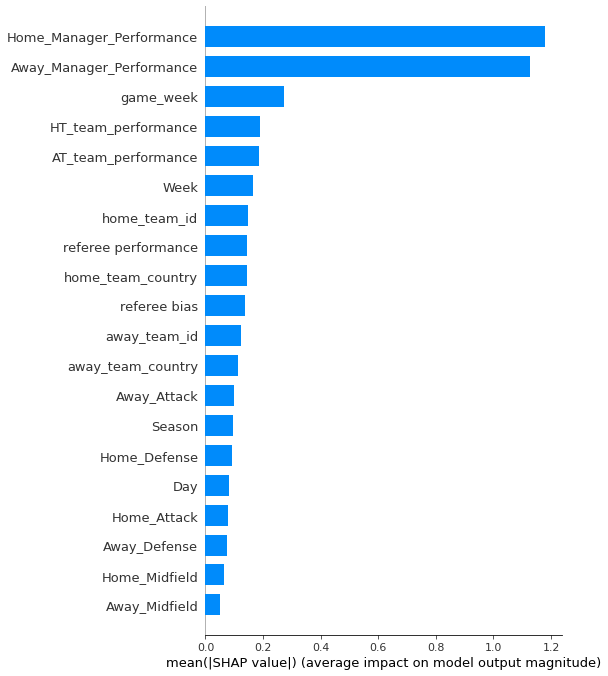

In [474]:
#XGBoost

from xgboost import XGBClassifier
from xgboost import plot_importance
xgb=XGBClassifier()
xgb.fit(df_train1,df_target)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(df_train1)
shap_values
shap.summary_plot(shap_values,df_train1, plot_type = 'bar')

In [475]:
df_train1.drop(['Home_Midfield', 'Away_Defense', 'Away_Midfield'], axis=1, inplace=True)

In [476]:
df_train1.dtypes

game_week                     int64
home_team_id                  int32
away_team_id                  int32
home_team_country             int32
away_team_country             int32
Week                          int64
Day                           int64
Season                        int64
Home_Defense                  int32
Home_Attack                   int32
Away_Attack                   int32
HT_team_performance         float64
AT_team_performance         float64
referee performance         float64
referee bias                float64
Home_Manager_Performance    float64
Away_Manager_Performance    float64
dtype: object

In [477]:
df_test.dtypes

season                        int64
game_week                     int64
game_id                      object
game_date                    object
home_team_id                 object
away_team_id                 object
home_formation               object
away_formation               object
home_num_injuries             int64
away_num_injuries             int64
referee_id                   object
home_team_name               object
away_team_name               object
refree_name                  object
referee_country              object
home_team_country            object
away_team_country            object
Date                          int64
Week                          int64
Day                           int64
Season                        int64
home_defense                 object
home_midfield                object
home_attack                  object
away_defense                 object
away_midfield                object
away_attack                  object
Home_Defense                

In [478]:
#fitting the model again

df_train1['home_team_id']=label_encoder.fit_transform(df_train1['home_team_id'])
df_train1['away_team_id']=label_encoder.fit_transform(df_train1['away_team_id'])
df_train1['home_team_country']=label_encoder.fit_transform(df_train1['home_team_country'])
df_train1['away_team_country']=label_encoder.fit_transform(df_train1['away_team_country'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train1, df_target, test_size = 0.2, random_state = 0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [479]:
Ytest=xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Ytest, y_test)
accuracy

0.7177631578947369

In [480]:
df_test['Season']=11

In [481]:
df_output1=df_test['game_id'].to_frame().reset_index()

In [482]:
df_test.drop(['season'], axis=1, inplace=True)
df_test.drop(['game_id'], axis=1, inplace=True)
df_test.drop(['game_date'], axis=1, inplace=True)
df_test.drop(['home_formation', 'away_formation', 'referee_id'], axis=1, inplace=True)
df_test.drop(['home_team_name', 'away_team_name', 'refree_name', 'referee_country'], axis=1, inplace=True)
df_test.drop(['Date', 'home_defense', 'home_midfield', 'home_attack'], axis=1, inplace=True)
df_test.drop(['away_defense', 'away_midfield', 'away_attack'], axis=1, inplace=True)
df_test.drop(['referee_name', 'HT_manager_name', 'AT_manager_name'], axis=1, inplace=True)
df_test.drop(['Home_Midfield', 'Away_Defense', 'Away_Midfield'], axis=1, inplace=True)
df_test.drop(['Home Strength', 'Away Strength'], axis=1, inplace=True)
df_test.drop(['home_num_injuries', 'away_num_injuries'], axis=1, inplace=True)

In [483]:

df_test['home_team_id']=label_encoder.fit_transform(df_test['home_team_id'])
df_test['away_team_id']=label_encoder.fit_transform(df_test['away_team_id'])
df_test['home_team_country']=label_encoder.fit_transform(df_test['home_team_country'])
df_test['away_team_country']=label_encoder.fit_transform(df_test['away_team_country'])

In [484]:

Ytest=xgb.predict(df_test)
prob = xgb.predict_proba(df_test)
prob

array([[0.98492056, 0.01507942],
       [0.25606304, 0.74393696],
       [0.17695272, 0.8230473 ],
       ...,
       [0.00616848, 0.9938315 ],
       [0.05685699, 0.943143  ],
       [0.01417738, 0.9858226 ]], dtype=float32)

In [485]:
df_output2 = pd.DataFrame(prob, columns = ['home_team_win_probability','away_team_win_probability'])

In [486]:
df_output2.drop(['away_team_win_probability'], axis=1, inplace=True)

In [487]:
df_output1.head()

,index,game_id
0,0,efl_07601
1,1,efl_07602
2,2,efl_07603
3,3,efl_07604
4,4,efl_07605


In [488]:
df_output2=df_output2.reset_index()

In [489]:
df_output2.head()

,index,home_team_win_probability
0,0,0.984921
1,1,0.256063
2,2,0.176953
3,3,0.100784
4,4,0.060931


In [490]:
df_finaloutput= pd.merge(df_output1, df_output2, on="index")

In [491]:
df_finaloutput.drop(['index'], axis=1, inplace=True)

In [492]:
df_finaloutput.head().reset_index(drop=True)

,game_id,home_team_win_probability
0,efl_07601,0.984921
1,efl_07602,0.256063
2,efl_07603,0.176953
3,efl_07604,0.100784
4,efl_07605,0.060931


In [493]:
df_finaloutput.to_csv('Novice_IIM Calcutta.csv', index=False)